In [1]:
#get relevant libraries
import scipy.stats as stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#Suspress Deprecation and Incorrect Usage Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_store = pd.read_excel("C:/Users/sbak0/Downloads/dunnhumby - Breakfast at the Frat.xlsx",  skiprows=[0], sheet_name=1)
df_product = pd.read_excel("C:/Users/sbak0/Downloads/dunnhumby - Breakfast at the Frat.xlsx",  skiprows=[0], sheet_name=2)
df_trans = pd.read_excel("C:/Users/sbak0/Downloads/dunnhumby - Breakfast at the Frat.xlsx",  skiprows=[0], sheet_name=3)

In [3]:
df_store.isna().sum()

STORE_ID                    0
STORE_NAME                  0
ADDRESS_CITY_NAME           0
ADDRESS_STATE_PROV_CODE     0
MSA_CODE                    0
SEG_VALUE_NAME              0
PARKING_SPACE_QTY          52
SALES_AREA_SIZE_NUM         0
AVG_WEEKLY_BASKETS          0
dtype: int64

In [4]:
df_store.columns

Index(['STORE_ID', 'STORE_NAME', 'ADDRESS_CITY_NAME',
       'ADDRESS_STATE_PROV_CODE', 'MSA_CODE', 'SEG_VALUE_NAME',
       'PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

In [5]:
#most row have empty data for parking space
df_store = df_store.drop(columns='PARKING_SPACE_QTY')

In [6]:
df_trans.isna().sum()

WEEK_END_DATE      0
STORE_NUM          0
UPC                0
UNITS              0
VISITS             0
HHS                0
SPEND              0
PRICE             23
BASE_PRICE       185
FEATURE            0
DISPLAY            0
TPR_ONLY           0
dtype: int64

In [7]:
#drop them as price contains na and this would be an issue when finidng price elasticity
df_trans = df_trans.dropna()

# Store

In [8]:
df_store.shape

(79, 8)

In [9]:
#store
df_store.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,46073,24766.807692
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,81958,54052.519231
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,48813,31177.333333
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,50237,20620.423077
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,43698,24321.942308


In [10]:
#rename the columns
df_store.rename(columns={'ADDRESS_CITY_NAME':'CITY', 'ADDRESS_STATE_PROV_CODE':'STATE', 'SEG_VALUE_NAME':'SEG_VALUE',
                         'PARKING_SPACE_QTY':"PARKING",'SALES_AREA_SIZE_NUM':'AREA_SIZE'}, inplace=True)

In [11]:
#area size
df_store['AREA_SIZE'].describe()

count       79.000000
mean     49145.164557
std      13512.452153
min      10788.000000
25%      43067.500000
50%      48594.000000
75%      55200.500000
max      86517.000000
Name: AREA_SIZE, dtype: float64

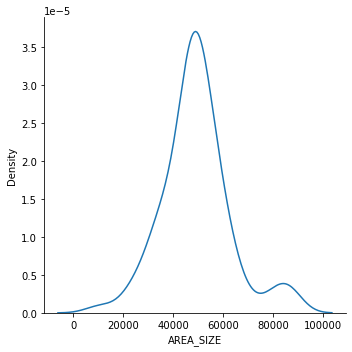

In [12]:
sns.displot(df_store, x='AREA_SIZE', kind='kde')

The distribution of stores in terms of available area size is normally distributed in the data.

<AxesSubplot:xlabel='STATE', ylabel='AVG_WEEKLY_BASKETS'>

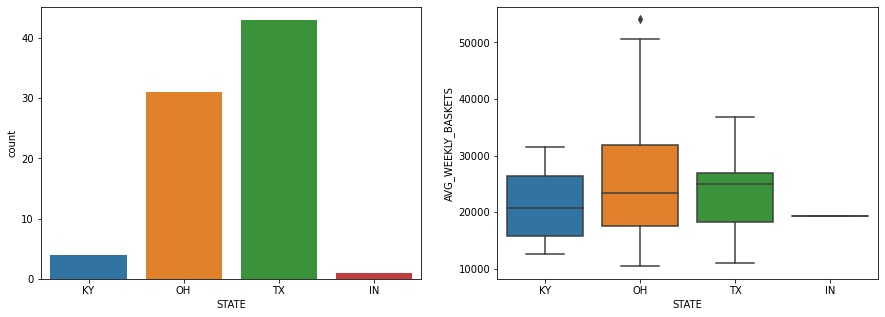

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15, 5)
sns.countplot('STATE', data=df_store, ax=ax1)
sns.boxplot(x='STATE', y='AVG_WEEKLY_BASKETS', data=df_store, ax=ax2)

<AxesSubplot:xlabel='STATE', ylabel='AVG_WEEKLY_BASKETS'>

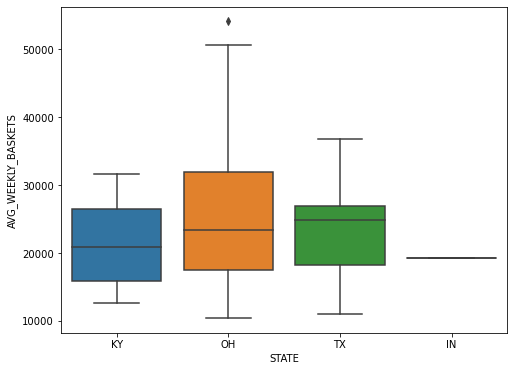

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(x='STATE', y='AVG_WEEKLY_BASKETS', data=df_store)

Texas(TX) is the state with the most stores and Indiana(IN) has the least. In fact, it seems like there is only one or 2 stores in Indiana. Texas has the highest average average weekly basket sales, then Ohio next but with higher number of average weekly baskets.

In [14]:
df_store.pivot_table(index=['STATE', 'SEG_VALUE'], values='STORE_NAME',
               aggfunc='count')

STORE_NAME
STATE SEG_VALUE             
IN    MAINSTREAM           1
KY    MAINSTREAM           3
      VALUE                1
OH    MAINSTREAM          16
      UPSCALE              7
      VALUE                8
TX    MAINSTREAM          23
      UPSCALE             10
      VALUE               10

<AxesSubplot:xlabel='SEG_VALUE', ylabel='count'>

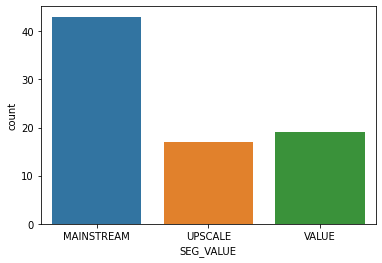

In [93]:
sns.countplot('SEG_VALUE', data=df_store )

Text(0.5, 1.0, 'Segment VS. Average Weekly Baskets')

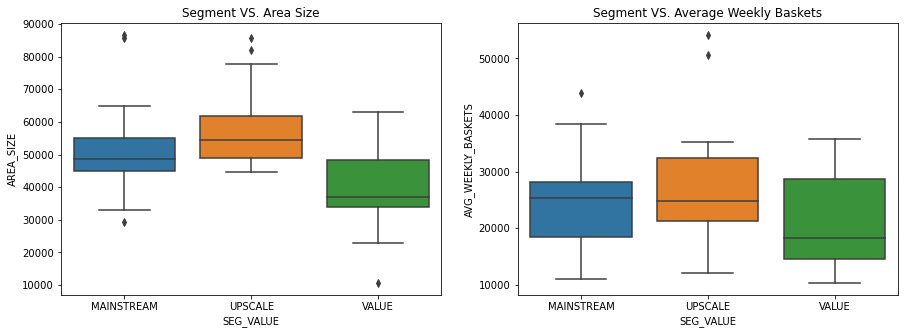

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15, 5)
sns.boxplot(x='SEG_VALUE', y='AREA_SIZE', data=df_store, ax=ax1).set_title('Segment VS. Area Size')
sns.boxplot(x='SEG_VALUE', y='AVG_WEEKLY_BASKETS', data=df_store, ax=ax2).set_title('Segment VS. Average Weekly Baskets')

Upscale has the biggest area size then Mainstream and Value generally have a smaller area size. Looking at the average weekly baskets for each segment, it seems as if the size of the area might have an effect on the sales of the basket which makes sense as bigger the area the more products they provide and more things to buy. However, we can't make any conclusion regarding it with the boxplots.

In [16]:
model = ols('AVG_WEEKLY_BASKETS ~ C(SEG_VALUE)', data=df_store).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(SEG_VALUE),3.468093e+08,2.0,2.359785,0.101326
Residual,5.584726e+09,76.0,NaN,NaN


In [17]:
model = ols('AVG_WEEKLY_BASKETS ~ C(AREA_SIZE)', data=df_store).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AREA_SIZE),5.760488e+09,72.0,2.806479,0.096049
Residual,1.710473e+08,6.0,NaN,NaN


For both P-values are above 0.05 and hence are not significant.

In [18]:
model = ols('AREA_SIZE ~ C(SEG_VALUE)', data=df_store).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(SEG_VALUE),3.581936e+09,2.0,12.768867,0.000017
Residual,1.065980e+10,76.0,NaN,NaN


# Product

In [19]:
df_product.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [20]:
df_product.pivot_table(index=['CATEGORY', 'SUB_CATEGORY', 'MANUFACTURER'], values='UPC',
                      aggfunc='count')

UPC
CATEGORY              SUB_CATEGORY                MANUFACTURER      
BAG SNACKS            PRETZELS                    FRITO LAY        3
                                                  MKSL             3
                                                  PRIVATE LABEL    3
                                                  SHULTZ           3
                                                  SNYDER S         3
COLD CEREAL           ADULT CEREAL                POST FOODS       2
                                                  PRIVATE LABEL    1
                      ALL FAMILY CEREAL           GENERAL MI       3
                                                  KELLOGG          1
                                                  PRIVATE LABEL    2
                                                  QUAKER           1
                      KIDS CEREAL                 KELLOGG          2
                                                  POST FOODS       1
                                                  QUAKER           2
FROZEN PIZZA          PIZZA/PREMIUM               HOME RUN         3
                                                  KING             3
                                                  PRIVATE LABEL    3
                                                  TOMBSTONE        3
                                                  TONYS            3
ORAL HYGIENE PRODUCTS MOUTHWASH/RINSES AND SPRAYS CHATTEM          2
                                                  COLGATE          1
                                                  P & G            2
                      MOUTHWASHES (ANTISEPTIC)    CHATTEM          1
                                                  P & G            1
                                                  PRIVATE LABEL    3
                                                  WARNER           3

# Transaction + Product +Store

In [21]:
#merge the two data
df= pd.merge(df_product, df_trans)
df= pd.merge(df, df_store, left_on='STORE_NUM', right_on='STORE_ID')
df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,WEEK_END_DATE,STORE_NUM,UNITS,VISITS,...,DISPLAY,TPR_ONLY,STORE_ID,STORE_NAME,CITY,STATE,MSA_CODE,SEG_VALUE,AREA_SIZE,AVG_WEEKLY_BASKETS
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,367,13,13,...,0,1,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
1,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-21,367,24,23,...,0,1,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
2,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-28,367,7,7,...,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
3,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-02-04,367,12,12,...,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
4,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-02-11,367,16,14,...,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051


In [22]:
df.columns

Index(['UPC', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY',
       'PRODUCT_SIZE', 'WEEK_END_DATE', 'STORE_NUM', 'UNITS', 'VISITS', 'HHS',
       'SPEND', 'PRICE', 'BASE_PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY',
       'STORE_ID', 'STORE_NAME', 'CITY', 'STATE', 'MSA_CODE', 'SEG_VALUE',
       'AREA_SIZE', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

In [23]:
df['MONTH'] = df['WEEK_END_DATE'].dt.month

In [24]:
df['PRICE_DIFF'] = df['BASE_PRICE'] - df['PRICE']

<AxesSubplot:xlabel='WEEK_END_DATE', ylabel='PRICE'>

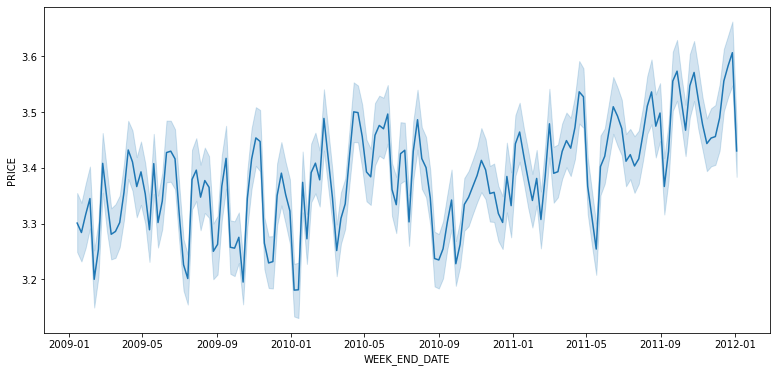

In [25]:
plt.figure(figsize=(13,6))
sns.lineplot(x='WEEK_END_DATE', y='PRICE', data=df)

<AxesSubplot:xlabel='WEEK_END_DATE', ylabel='SPEND'>

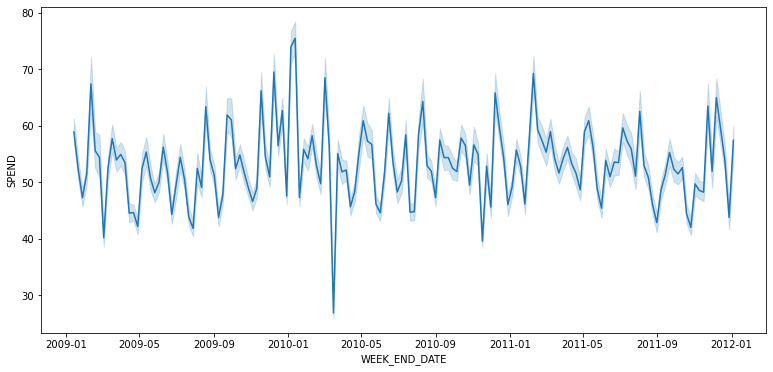

In [26]:
plt.figure(figsize=(13,6))
sns.lineplot(x='WEEK_END_DATE', y='SPEND', data=df)

<AxesSubplot:xlabel='MONTH', ylabel='SPEND'>

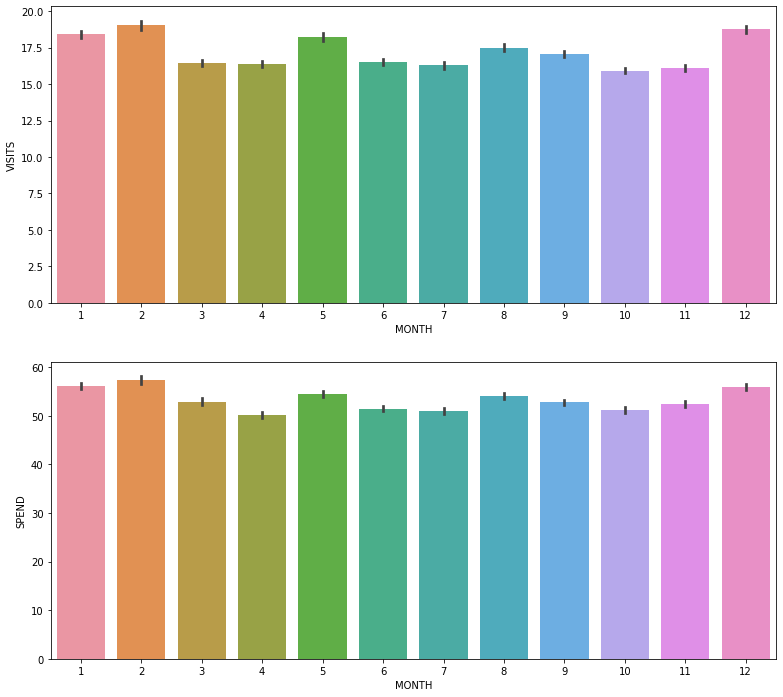

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(13, 12)
sns.barplot(x='MONTH', y='VISITS', data=df, ax=ax1)
sns.barplot(x='MONTH', y='SPEND', data=df, ax=ax2)

## Promotion

In [67]:
df_p = df.assign(PROMO = df['FEATURE'].astype(str) + ',' + df['DISPLAY'].astype(str)
                +',' + df['TPR_ONLY'].astype(str))

In [68]:
df_p.loc[(df_p['PROMO'] == '1,0,0'), 'PROMO'] = 'Feature'
df_p.loc[(df_p['PROMO'] == '0,1,0'), 'PROMO'] = 'Display'
df_p.loc[(df_p['PROMO'] == '0,0,1'), 'PROMO'] = 'TPR_only'
df_p.loc[(df_p['PROMO'] == '1,1,0'), 'PROMO'] = 'F&D'
df_p.loc[(df_p['PROMO'] == '0,0,0'), 'PROMO'] = 'None'

In [69]:
df_p['PROMO'].head()

0    TPR_only
1    TPR_only
2        None
3        None
4        None
Name: PROMO, dtype: object

In [74]:
df_p['UNITS_log'] = np.log(df_p['UNITS'])

<AxesSubplot:xlabel='PROMO', ylabel='UNITS_log'>

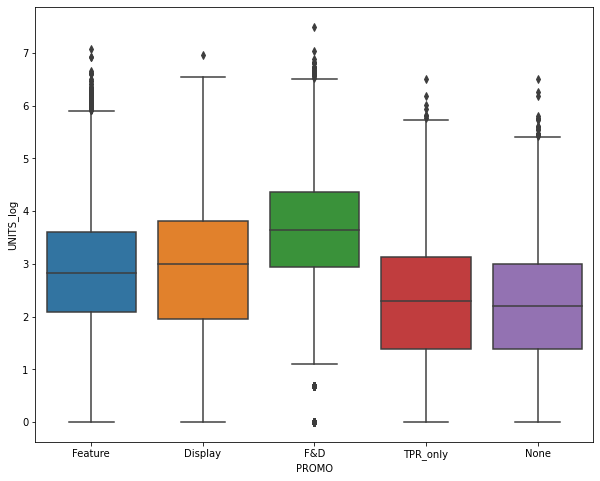

In [75]:
values = ['Feature', 'Display', 'F&D', 'TPR_only', 'None']

plt.figure(figsize=(10,8))
sns.boxplot(x='PROMO', y='UNITS_log', order = values,
            data=df_p)

## Price Elasticity

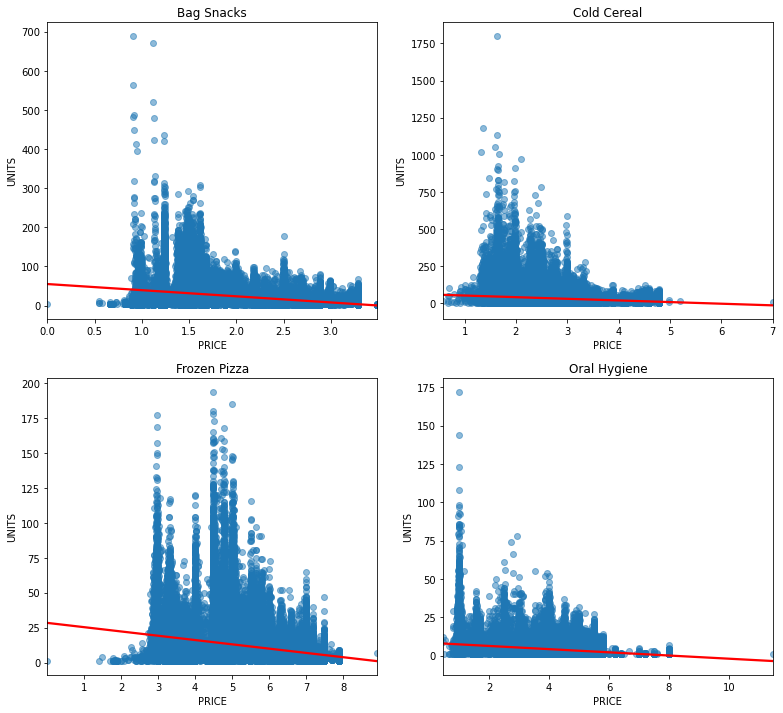

In [19]:
fig, axes = plt.subplots(2,2)
sns.regplot(x='PRICE', y='UNITS', data=df.loc[df['CATEGORY']=='BAG SNACKS'], 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'r'}, ax=axes[0,0]).set_title('Bag Snacks')
sns.regplot(x='PRICE', y='UNITS', data=df.loc[df['CATEGORY']=='COLD CEREAL'], 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'r'}, ax=axes[0,1]).set_title('Cold Cereal')
sns.regplot(x='PRICE', y='UNITS', data=df.loc[df['CATEGORY']=='FROZEN PIZZA'], 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'r'}, ax=axes[1,0]).set_title('Frozen Pizza')
sns.regplot(x='PRICE', y='UNITS', data=df.loc[df['CATEGORY']=='ORAL HYGIENE PRODUCTS'], 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'r'}, ax=axes[1,1]).set_title('Oral Hygiene')
fig.set_size_inches(13, 12)

In [214]:
#BAG SNACKS regression resulted in NAN so the price was further examined
df_Snacks = df.loc[df['CATEGORY']=='BAG SNACKS']
df_Snacks['PRICE'].unique()

array([1.39, 1.36, 1.38, 1.5 , 1.49, 1.48, 1.46, 1.21, 1.24, 1.22, 1.25,
       1.65, 1.69, 1.68, 1.23, 1.19, 1.47, 1.26, 1.45, 1.42, 1.37, 1.34,
       1.51, 1.53, 1.54, 1.55, 1.52, 1.57, 1.59, 1.63, 1.62, 1.6 , 1.67,
       1.16, 1.44, 1.35, 1.43, 1.56, 1.61, 1.05, 1.15, 1.17, 1.32, 1.4 ,
       2.18, 2.99, 1.99, 2.49, 3.29, 2.89, 2.7 , 2.5 , 2.53, 2.12, 1.83,
       0.82, 1.88, 1.97, 1.92, 1.73, 1.41, 2.63, 1.79, 2.47, 2.19, 2.13,
       2.3 , 2.06, 2.35, 1.77, 1.1 , 1.75, 2.09, 1.86, 2.33, 1.9 , 0.87,
       1.94, 0.7 , 2.02, 1.85, 1.72, 1.28, 1.81, 1.2 , 0.99, 0.9 , 1.18,
       1.96, 2.74, 1.04, 2.07, 0.  , 1.58, 2.01, 2.04, 1.64, 2.  , 2.39,
       2.25, 2.29, 2.24, 2.34, 2.37, 2.69, 2.71, 2.57, 2.79, 2.54, 2.43,
       3.04, 2.36, 2.77, 2.22, 2.94, 2.96, 3.06, 2.98, 2.93, 2.03, 2.91,
       2.8 , 2.26, 3.27, 3.26, 3.07, 1.31, 2.62, 1.95, 2.2 , 1.84, 1.74,
       1.76, 1.82, 2.44, 2.15, 2.4 , 1.66, 1.89, 1.71, 2.14, 2.05, 2.27,
       1.7 , 2.52, 2.08, 2.66, 2.64, 2.1 , 2.48, 2.

In [224]:
#a zero value is taken out
df_Snacks = df_Snacks.loc[~(df_Snacks['PRICE']==0), ]

In [191]:
result = []

In [192]:
#Bag Snacks Price elasticity
snack_model = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Snacks, missing='drop').fit()
print(snack_model.summary())
result.append({'category': 'snack', 'price elasticity': snack_model.params[1]})

                            OLS Regression Results                            
Dep. Variable:          np.log(UNITS)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                 3.781e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:06:00   Log-Likelihood:            -1.8448e+05
No. Observations:              130105   AIC:                         3.690e+05
Df Residuals:                  130103   BIC:                         3.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5217      0.006    560.915

In [233]:
#Cold Cereal Price elasticity
df_Cereal = df.loc[df['CATEGORY']=='COLD CEREAL']
cereal_model = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Cereal).fit()
print(cereal_model.summary())
result.append({'category': 'cereal', 'price elasticity': cereal_model.params[1]})

                            OLS Regression Results                            
Dep. Variable:          np.log(UNITS)   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4062.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:47:46   Log-Likelihood:            -2.2616e+05
No. Observations:              174128   AIC:                         4.523e+05
Df Residuals:                  174126   BIC:                         4.523e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6384      0.008    447.048

In [244]:
df.loc[df['CATEGORY']=='PIZZA']

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,WEEK_END_DATE,STORE_NUM,UNITS,VISITS,...,DISPLAY,TPR_ONLY,STORE_ID,STORE_NAME,CITY,STATE,MSA_CODE,SEG_VALUE,AREA_SIZE,AVG_WEEKLY_BASKETS


In [245]:
#Frozen Pizza Price elasticity
df_Pizza = df.loc[df['CATEGORY']=='FROZEN PIZZA']
pizza_model = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Pizza).fit()
print(pizza_model.summary())
result.append({'category': 'pizza', 'price elasticity': pizza_model.params[1]})

                            OLS Regression Results                            
Dep. Variable:          np.log(UNITS)   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                 2.217e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:50:32   Log-Likelihood:            -1.5194e+05
No. Observations:              114321   AIC:                         3.039e+05
Df Residuals:                  114319   BIC:                         3.039e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3070      0.016    276.988

In [249]:
#Oral Hygiene Price elasticity
df_Oral = df.loc[df['CATEGORY']=='ORAL HYGIENE PRODUCTS']
oralhy_model = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Oral).fit()
print(oralhy_model.summary())
result.append({'category': 'oral hygiene', 'price elasticity': oralhy_model.params[1]})

                            OLS Regression Results                            
Dep. Variable:          np.log(UNITS)   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:55:25   Log-Likelihood:            -1.4075e+05
No. Observations:              119880   AIC:                         2.815e+05
Df Residuals:                  119878   BIC:                         2.815e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8423      0.006    301.837

In [196]:
p_elasticity = pd.DataFrame(result)
p_elasticity

,category,price elasticity
0,snack,-1.502046
1,cereal,-0.514102
2,pizza,-1.397692
3,oral hygiene,-0.579478


In [250]:
state_r = []

In [251]:
#Bag Snacks Price elasticity in each State
snack_KY = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Snacks.loc[df_Snacks['STATE']=='KY'], missing='drop').fit()
state_r.append({'category':'snack', 'state':'KY', 'price elasticity': snack_KY.params[1]})
snack_OH = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Snacks.loc[df_Snacks['STATE']=='OH'], missing='drop').fit()
state_r.append({'category':'snack', 'state':'OH', 'price elasticity': snack_OH.params[1]})
snack_TX = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Snacks.loc[df_Snacks['STATE']=='TX'], missing='drop').fit()
state_r.append({'category':'snack', 'state':'TX', 'price elasticity': snack_TX.params[1]})
snack_IN = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Snacks.loc[df_Snacks['STATE']=='IN'], missing='drop').fit()
state_r.append({'category':'snack', 'state':'IN', 'price elasticity': snack_IN.params[1]})

In [252]:
#Cold Cereal Price elasticity in each State
cereal_KY = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Cereal.loc[df_Cereal['STATE']=='KY'], missing='drop').fit()
state_r.append({'category':'cereal', 'state':'KY', 'price elasticity': cereal_KY.params[1]})
cereal_OH = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Cereal.loc[df_Cereal['STATE']=='OH'], missing='drop').fit()
state_r.append({'category':'cereal', 'state':'OH', 'price elasticity': cereal_OH.params[1]})
cereal_TX = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Cereal.loc[df_Cereal['STATE']=='TX'], missing='drop').fit()
state_r.append({'category':'cereal', 'state':'TX', 'price elasticity': cereal_TX.params[1]})
cereal_IN = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Cereal.loc[df_Cereal['STATE']=='IN'], missing='drop').fit()
state_r.append({'category':'cereal', 'state':'IN', 'price elasticity': cereal_IN.params[1]})

In [253]:
#Frozen Pizza Price elasticity in each State
pizza_KY = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Pizza.loc[df_Pizza['STATE']=='KY'], missing='drop').fit()
state_r.append({'category':'pizza', 'state':'KY', 'price elasticity': pizza_KY.params[1]})
pizza_OH = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Pizza.loc[df_Pizza['STATE']=='OH'], missing='drop').fit()
state_r.append({'category':'pizza', 'state':'OH', 'price elasticity': pizza_OH.params[1]})
pizza_TX = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Pizza.loc[df_Pizza['STATE']=='TX'], missing='drop').fit()
state_r.append({'category':'pizza', 'state':'TX', 'price elasticity': pizza_TX.params[1]})
pizza_IN = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Pizza.loc[df_Pizza['STATE']=='IN'], missing='drop').fit()
state_r.append({'category':'pizza', 'state':'IN', 'price elasticity': pizza_IN.params[1]})

In [254]:
#Oral Hygeine Price elasticity in each State
oral_KY = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Oral.loc[df_Oral['STATE']=='KY'], missing='drop').fit()
state_r.append({'category':'oral', 'state':'KY', 'price elasticity': oral_KY.params[1]})
oral_OH = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Oral.loc[df_Oral['STATE']=='OH'], missing='drop').fit()
state_r.append({'category':'oral', 'state':'OH', 'price elasticity': oral_OH.params[1]})
oral_TX = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Oral.loc[df_Oral['STATE']=='TX'], missing='drop').fit()
state_r.append({'category':'oral', 'state':'TX', 'price elasticity': oral_TX.params[1]})
oral_IN = ols("np.log(UNITS) ~ np.log(PRICE)", data=df_Oral.loc[df_Oral['STATE']=='IN'], missing='drop').fit()
state_r.append({'category':'oral', 'state':'IN', 'price elasticity': oral_IN.params[1]})

In [256]:
state_p_elasticity = pd.DataFrame(state_r)
state_p_elasticity

,category,state,price elasticity
0,snack,KY,-2.568608
1,snack,OH,-2.082969
2,snack,TX,-1.163397
3,snack,IN,-2.600037
4,cereal,KY,-1.042280
5,cereal,OH,-0.904728
6,cereal,TX,-0.222226
7,cereal,IN,-1.105128
8,pizza,KY,-2.145849
9,pizza,OH,-1.660055


<AxesSubplot:xlabel='category', ylabel='price elasticity'>

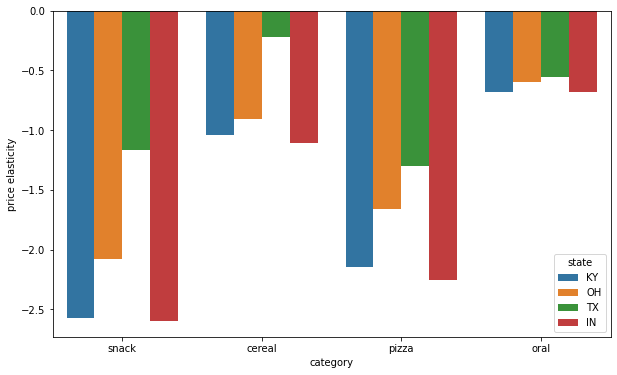

In [271]:
plt.figure(figsize=(10, 6))
sns.barplot(x="category", y="price elasticity", hue="state", data=state_p_elasticity, ci=None)